<a href="https://colab.research.google.com/github/ChinmoyKumerRoy/ChinmoyKumerRoy/blob/main/NamtaDB_all_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

In [ ]:
x = np.load('/content/drive/My Drive/Colab Notebooks/LICT/NamtaDB_64_npy/NamtaDB_64_x.npy')/255
y = np.load('/content/drive/My Drive/Colab Notebooks/LICT/NamtaDB_64_npy/NamtaDB_64_y.npy')

In [ ]:
x = x.reshape(-1,64,64,1)
from keras.utils import to_categorical
y = to_categorical(y)

Using TensorFlow backend.


In [ ]:
y.shape

(72045, 10)

In [ ]:
x.shape

(72045, 64, 64, 1)

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [ ]:
model = Sequential()



model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(64, 64, 1)))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 16)        416       
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 30, 30, 32)        544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 15, 15, 64)       

In [ ]:
history = model.fit(x,y, validation_split=0.2, epochs=20, batch_size=150)

Train on 57636 samples, validate on 14409 samples
Epoch 1/20
57636/57636 [==============================] - 22s 376us/step - loss: 1.0576 - accuracy: 0.6486 - val_loss: 0.4040 - val_accuracy: 0.8794
Epoch 2/20
57636/57636 [==============================] - 15s 264us/step - loss: 0.3561 - accuracy: 0.8838 - val_loss: 0.3437 - val_accuracy: 0.8990
Epoch 3/20
57636/57636 [==============================] - 15s 264us/step - loss: 0.2466 - accuracy: 0.9190 - val_loss: 0.2797 - val_accuracy: 0.9144
Epoch 4/20
57636/57636 [==============================] - 15s 263us/step - loss: 0.1968 - accuracy: 0.9349 - val_loss: 0.2758 - val_accuracy: 0.9148
Epoch 5/20
57636/57636 [==============================] - 15s 266us/step - loss: 0.1679 - accuracy: 0.9441 - val_loss: 0.2774 - val_accuracy: 0.9094
Epoch 6/20
57636/57636 [==============================] - 15s 266us/step - loss: 0.1453 - accuracy: 0.9518 - val_loss: 0.2702 - val_accuracy: 0.9173
Epoch 7/20
57636/57636 [==============================] 

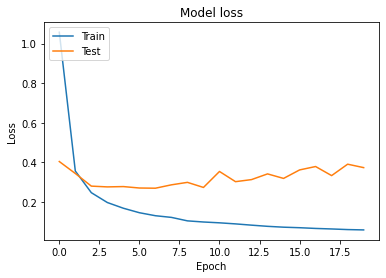

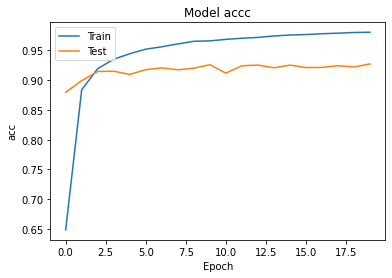

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('NamtaDB_model_64.h5')

In [ ]:
model.save('NamtaDB_model____64.h5')

In [ ]:
import cv2

all_img = []

img1 = cv2.imread('/content/test.png',0)
(thresh, im_bw) = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
inv = cv2.bitwise_not(im_bw)
a = all_img.append(cv2.resize(inv, (64,64)))


In [ ]:
image = cv2.imread('/content/test.png')

def segment(image, height=64):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7, 7), 0)
 
    # threshold the image
    ret,thresh1 = cv2.threshold(gray ,100,255,cv2.THRESH_BINARY_INV)
 
    # dilate the white portions
    dilate = cv2.dilate(thresh1, None, iterations=2)
 
    # find contours in the image
    cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[1] if imutils.is_cv2() else cnts[0]
 
    orig = image.copy()
    i = 0
    t = 0
    c=0
    x_all = []
    w_all = []
    lines = []
    parts = []
 
    for cnt in cnts:
        # Check the area of contour, if it is very small ignore it
        if(cv2.contourArea(cnt) < 100):
            continue
 
        # Filtered countours are detected
        x,y,w,h = cv2.boundingRect(cnt)
        x_all.append(x)
        w_all.append(w)
        i = i + 1
 
    comb = np.zeros((2,len(x_all)))
    comb[0,:]=x_all
    comb[1,:]=w_all
    comb = comb.T
    comb = comb[comb[:,0].argsort()]
 
    x_all = comb[:,0]
    w_all = comb[:,1]
 
 
    for i, item in enumerate (x_all):
        if i < len(x_all)-1:
            lines.append((item+w_all[i]+x_all[i+1])/2)
 
 
    for i in range(len(lines)):
        parts.append(cv2.resize(image[:,t:int(lines[i]),:],(height,height)))
        t = int(lines[i])
        if i == len(lines)-1:
            parts.append(cv2.resize(image[:,t:,:],(height,height)))
   
    return parts

In [ ]:
import cv2

import imutils
img = cv2.imread('/content/test.png')
output = segment(img,64)

#for i in range()
